In [1]:
import os
from os.path import abspath, join

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle

from src.data.load_dataset import generate_frequency_detection, generate_frequency_XOR

In [2]:
## set the matplotlib params
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# set plotting params
colors = {'sensilla': '#2c7fb8', 'classical': '#d95f02', 'incompatible': '#91cf60'}

In [3]:
data_dir = abspath(join(os.getcwd(), '../../'))

### Load saved results

In [4]:
load_dir = data_dir + '/models/results'
with open(load_dir + '/freq_detection/freq_detection_sensilla_estimator.pickle', 'rb') as handle:
    freq_det = pickle.load(handle)
    
with open(load_dir + '/freq_XOR/freq_XOR_sensilla_estimator.pickle', 'rb') as handle:
    freq_XOR = pickle.load(handle)

### Frequency detection

#### Plot frequency detection task

(0.0, 100.0)

<Figure size 432x288 with 0 Axes>

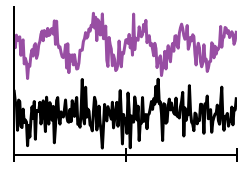

In [5]:
num_samples, sampling_rate, freq, duration, snr = 5000, 2000, 50, 0.1, 0.8
X, y = generate_frequency_detection(num_samples, sampling_rate, freq, duration, snr, seed=20)
N = int(sampling_rate * duration)
t = np.arange(N) / sampling_rate * 1000

fig = plt.figure()
fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(211)
plt.plot(t, X[y == 1][0], c='#984ea3', lw=3, alpha=1, label='$\omega_1=$%d Hz' % freq)
plt.plot(t, X[y == 0][0] - 1.2, c='#000000', lw=3, alpha=1,label=r'white noise')

# format ticks
plt.yticks([])
ax.set_xticklabels([])
plt.xticks(np.arange(0, 150, 50))
plt.xlim(0, 100)

# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_6/frequency_detection_task.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

#### Plot classification results on the frequency detection task

sensilla, (281, 0.0000)
classical, (281, 0.8143)
incompatible, (281, 19.9714)


[Text(0, 0.0, ''), Text(0, 0.25, ''), Text(0, 0.5, '')]

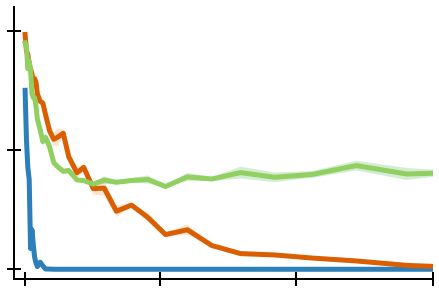

In [6]:
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for key, col in colors.items():
    hidden_size = freq_det[key]['hidden_size']
    avg_test_err = 1 - np.array(freq_det[key]['mean'])
    std_err = np.array(freq_det[key]['std_err'])
    plt.plot(hidden_size, avg_test_err, label=key, lw=5, c=col)
    plt.fill_between(hidden_size, avg_test_err - std_err, avg_test_err + std_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (key, hidden_size[32], avg_test_err[32] * 100))

# format limits
plt.xlim([-7, 300])
plt.ylim([-0.02, 0.55])
plt.yticks(np.arange(0, 0.55, 0.25))
plt.xticks([1, 100, 200, 300])
ax.set_xticklabels([])
ax.set_yticklabels([])

# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_6/frequency_detection_results.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

### Frequency XOR

#### Plot the frequency XOR task

(-3.25, 2.25)

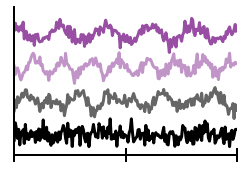

In [7]:
num_samples, sampling_rate, freq1, freq2, duration, snr = 5000, 2000, 50, 80, 0.1, 0.8
X, y = generate_frequency_XOR(num_samples, sampling_rate, freq1, freq2, duration, snr, seed=20, shuffle=False)
t = np.arange(0, duration, 1 / sampling_rate) * 1000

fig = plt.figure(figsize=(4, 6))
ax = fig.add_subplot(211)
plt.plot(t, X[0] + 1.25, c='#984ea3', lw=3, alpha=1, label='$\omega_1=$%d Hz' % freq1)
plt.plot(t, X[1250], c='#984ea3', lw=3, alpha=0.6, label=r'$\omega_2=$%d Hz' % freq2)
plt.plot(t, X[2501] - 1.25, c='#000000', lw=3, alpha=0.6, label=r'mixed $%d$ & $%d$ Hz' % (freq1, freq2))
plt.plot(t, X[-1] - 2.5, c='#000000', lw=3, alpha=1, label='white noise')

# format ticks
plt.xticks(np.arange(0, 150, 50))
plt.yticks([])
ax.set_xticklabels([])
plt.xlim(0, 100)
plt.ylim(-3.25, 2.25)
    
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_6/frequency_XOR_task.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

#### Plot the classification results on frequency XOR task

sensilla, (281, 0.0000)
classical, (281, 8.1000)
incompatible, (281, 25.5000)


[Text(0, 0.0, ''), Text(0, 0.25, ''), Text(0, 0.5, '')]

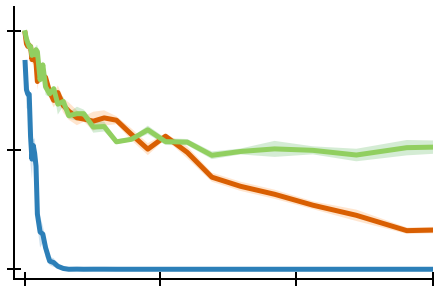

In [8]:
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for key, col in colors.items():
    hidden_size = freq_XOR[key]['hidden_size']
    avg_test_err = 1 - np.array(freq_XOR[key]['mean'])
    std_err = np.array(freq_XOR[key]['std_err'])
    plt.plot(hidden_size, avg_test_err, label=key, lw=5, c=col)
    plt.fill_between(hidden_size, avg_test_err - std_err, avg_test_err + std_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (key, hidden_size[32], avg_test_err[32] * 100))

# format limits
plt.xlim([-7, 300])
plt.yticks(np.arange(0, 0.55, 0.25))
plt.ylim([-0.02, 0.55])
plt.xticks([1, 100, 200, 300])
ax.set_xticklabels([])
ax.set_yticklabels([])

# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_6/frequency_XOR_results.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)